In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from variational_forms import _VariationalForm
from feature_maps import MediumFeatureMap
from pegasos_experiment_shots import generate_qsvm_data
from quantum_neural_networks import QuantumNeuralNetwork

Matplotlib setup

In [6]:
from matplotlib.colors import LinearSegmentedColormap
blue = '#1f77b4'
orange = '#ff7f0e'
colormap = {1 : blue, -1 : orange}

# blue
color_0 = '#1f77b4'
color_0_light = '#8fbbd9'

# orange
color_1 = '#ff7f0e'
color_1_light = '#ffbf86'

cmap = LinearSegmentedColormap.from_list('blue_orange', [color_1_light, '#FFFFFF', color_0_light], N=100)

plt.rcParams.update({'font.size': 24,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'axes.titlesize': 28,
                     'axes.labelsize': 28,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})

Setting up the feature map

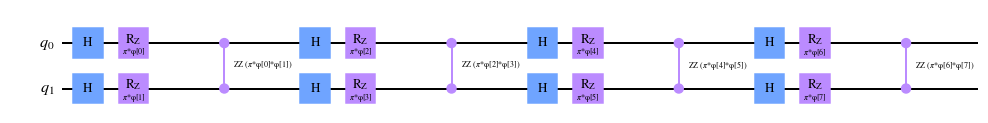

In [7]:
f = MediumFeatureMap(2,4)
f.circuit.draw(output='mpl',filename='plots/feature_map.eps')

Genearting the data sets for positive and negative margins

In [8]:
(X,y),_ = generate_qsvm_data(f,0.1,100,0)
(X2,y2),_ = generate_qsvm_data(f,-0.1,100,0)

Predictions of a meshgrid for the background colouring

In [9]:
# Trivial variational form
varform = _VariationalForm(2,1,None)
# This qnn is equivalent to just using the feature map
qnn = QuantumNeuralNetwork(feature_map=f,variational_form=varform)
# Making sure the seed is the same as for the generated data above
np.random.seed(41)
theta = np.random.uniform(0, 2*np.pi, size=qnn.d)
qnn.fit_theta(theta)



In [10]:
x = np.linspace(0,1,100)
xx,yy = np.meshgrid(x,x)
# Array containing all the coordinates in [0,1]^2
xxx = np.array(list(zip(xx.reshape(-1),yy.reshape(-1)))).reshape(-1,2)
Z = qnn.predict_proba(xxx)

Plotting the data

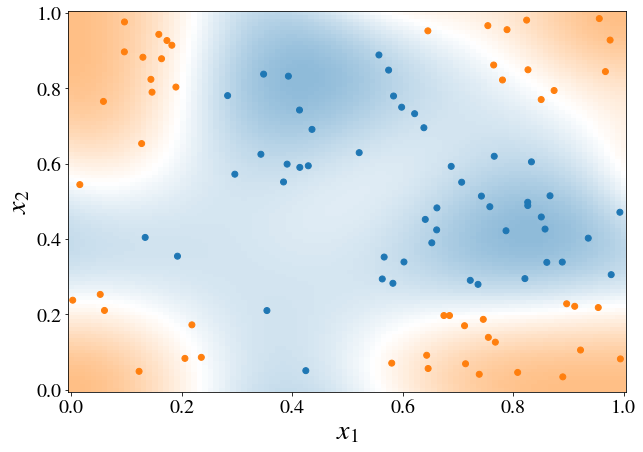

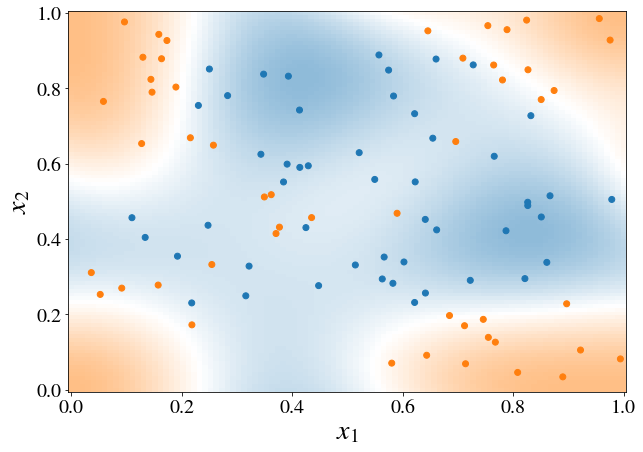

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],c= list(map(colormap.get,y)),zorder=100)
plt.pcolormesh(xx, yy, Z.reshape(xx.shape), cmap=cmap, alpha=1)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.savefig('plots/data_separable.png',dpi=300,bbox_inches='tight')
plt.figure(figsize=(10,7))
plt.scatter(X2[:,0],X2[:,1],c=list(map(colormap.get,y2)),zorder=100)
plt.pcolormesh(xx, yy, Z.reshape(xx.shape), cmap=cmap, alpha=1)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.savefig('plots/data_overlap.png',dpi=300,bbox_inches='tight')